# Week 10 More about Plots and Figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

**DISCUSS** What is wrong with these figures?

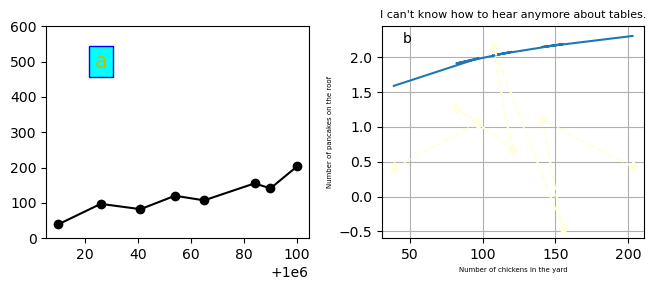

In [4]:
plt.figure(figsize = (10, 3))

plt.subplot(1, 3, 1)
x = np.array([10,26,41,54,65,84,90,100])+1e6
y = np.array([39,97,82,120,107,155,141,203])
plt.plot(x,y,'ok-')
plt.text(x[1], 500, "a", ha = "center", va = "center", size = 15,\
    bbox = dict( fc="cyan", ec = "b", lw = 1),c = 'y' )

plt.ylim(0,600)

plt.subplot(1,3,2)
plt.plot(y,np.log10(y))
plt.plot(y,.4/np.sin(y),color = 'lightyellow',marker = 'd',linestyle = '--')
plt.xlabel("Number of chickens in the yard",fontsize = 5)
plt.ylabel("Number of pancakes on the roof",fontsize = 5)
plt.title("I can't know how to hear anymore about tables.",fontsize = 8)
plt.text(45,2.2,'b')
plt.grid()
plt.tight_layout()
plt.show()

### What makes a plot a good one?

- Titles/label (at appropriate (readable) size)

- Appropriate color contrast for lines and markers

- Legends if needed

- Proper scaling for the data! 


### Recap/Practice

- Get the data for Old Faithful erruptions in *old_faithful_data.dat*
- Make a readable, publication-ready scatter plot.
- Save it as a .png image. 

In [257]:
#make sure to check what is in the file!

with open('old_faithful_data.dat','r') as f:
    print(f.readline())
    print(f.readline())
    print(f.readline())
f.close()
olf_erupt = np.genfromtxt('old_faithful_data.dat' )
duration = olf_erupt[:,1]
between_time = olf_erupt[ :, 2 ]

plt.figure( figsize = ( 8, 4 ) )

plt.scatter( duration, between_time, color = 'red',marker = '^')

plt.xlabel( 'Eruption duration (min)', fontsize = 15 )
plt.ylabel( 'Time between eruptions (min)', fontsize = 15 )
plt.title( "Old Faithful Geyser Eruptions")
plt.xticks( fontsize = 15 )
plt.yticks( fontsize = 15 )
plt.tight_layout()
plt.show()

## Old faithful erruption data -- from statpoint.net

## duration	waiting time

## Row # --	min*1e3	-- minutes between eruptions



## The *Axes* Object

- you can make changes to your plots on the fly if they are outside of your notebook i.e. Ipython
- A lot more functionality compared to plt.
- Commonly abbreviated *ax*

**TRY IT!** Make a plot of sine of $x$ where $x$ ranges from 0 to 15 and has 1000 elements.

In [241]:
%matplotlib
#let's make a basic plot of x vs y for this random sinusoidal data:
x = np.linspace( 0, 15, 1000 )
y = np.sin( x )

fig, ax = plt.subplots( figsize = (12, 6) )  # create a figure object

ax.plot( x, y , linewidth = 4)                     #make the plot 
ax.set_ylabel( 'Y', color='red', fontsize=20 )    # add X and Y labels and make them red
ax.set_xlabel( 'X', color='blue', fontsize=20 )
ax.tick_params( axis="both", labelsize=18 )       # change the size of your tick labels


Using matplotlib backend: macosx


In [242]:
ax.set_title(r"My $\sin(x)$")

Text(0.5, 1.0, 'My $\\sin(x)$')

### Let's pull our plot back inline (in the notebook)
- The *axes* method offers you more flexibility than the plt-for example, you can make a second y-axis (or a second x-axis) in a plot.

**EXAMPLE:**

In [243]:
%matplotlib inline

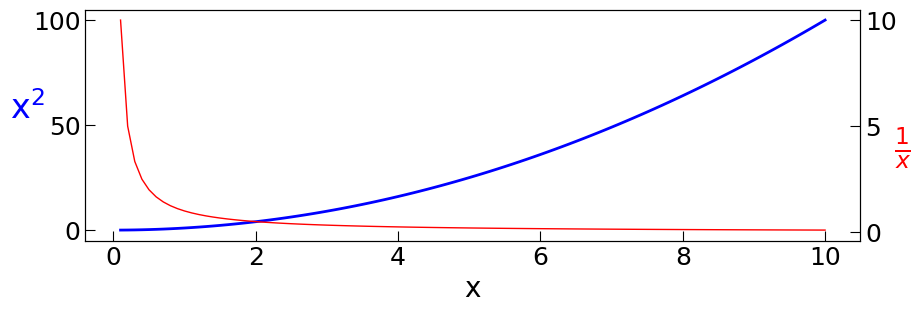

In [244]:

x = np.linspace(0.1, 10., 100)

fig = plt.figure( figsize = (10,3) )

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot( x, x ** 2, color= 'blue' , linewidth = 2 )
ax1.set_ylabel( 'x$^2$', color='blue', fontsize=24, rotation = 0 )
ax1.set_xlabel('x',fontsize=20)
ax1.tick_params( axis="both", labelsize=18, length = 7 , direction = 'in' )

ax2 = ax1.twinx()

ax2.plot( x, 1/x, color='red',linewidth = 1)
ax2.set_ylabel(r'$ \frac{1}{x} $', color='red',fontsize=24, rotation = 0)
ax2.tick_params( axis="y", labelsize=18 , length = 7 , direction = 'in', )
plt.show()

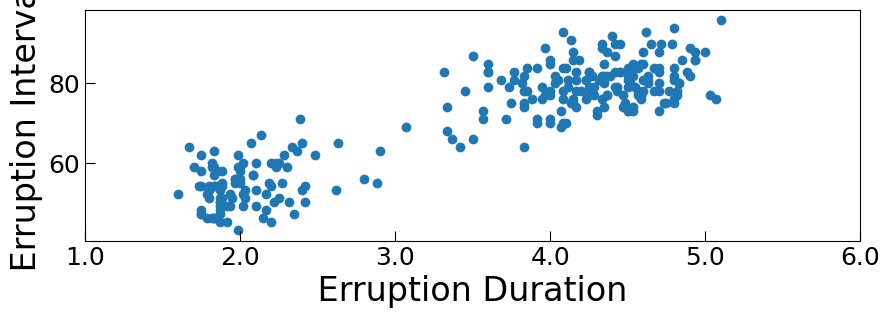

In [245]:
# Now let's go back to the Old Faithful data and make a scatter plot with ax:

# let Python know you start a fig with 1 'subplot' under 'ax' :
fig, ax = plt.subplots( figsize = ( 10, 3 ) )

ax.scatter( olf_erupt[ :, 1 ]  / 1000. , olf_erupt[ :, 2 ]  )

ax.set_xlabel( ' Erruption Duration ' , size = 24 )
ax.set_ylabel( ' Erruption Interval ' , size = 24 )

# change the fontsize of your tickmarks:

ax.set_xticks( np.arange( 1, 6.2, 1. ) )
ax.set_xticklabels( np.arange( 1, 6.2, 1. ), fontsize = 14 )


# let's make our tickmars a bit clearer:

ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize=18)
plt.show()

### Layout with multiple plots


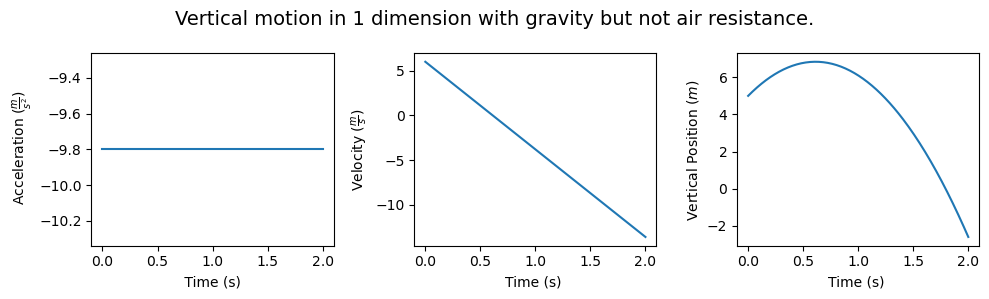

In [251]:
fig, ( ax1, ax2, ax3 ) = plt.subplots(1,3, figsize = (10, 3 ))

fig.suptitle('Vertical motion in 1 dimension with gravity but not air resistance.' , fontsize = 14 )

#make some arrays: 
v0 = 6 #m/s
y0 = 5 #m 
a = -9.8*np.ones(200) #constant acceleration of gravity
t = np.linspace(0,2,200) #time in seconds
v = a*t + v0 #integrate
y = 0.5*a*t**2 + v0*t + y0 #integrate

#start with the first one:

ax1.plot( t,a )
ax1.set_xlabel( ' Time (s) ' , fontsize = 10 )
ax1.set_ylabel( r' Acceleration ($\frac{m}{s^2}$) ' , fontsize = 10 )

#you can define what your tickmarks will be via the set_xticks (or y) and _xticklabels

#ax1.set_xticks( 1900 + np.arange( 4 ) * 20 )
#ax1.set_xticklabels( 1900 + np.arange( 4 ) * 20 , fontsize = 14 )
#ax1.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize=14 )

# go to the second one:

ax2.plot( t , v ) 
ax2.set_xlabel( 'Time (s) ' , fontsize = 10 )
ax2.set_ylabel( r'Velocity ($\frac{m}{s}$) ' , fontsize = 10 )
#ax2.set_xticks( 1960 + np.arange( 4 ) * 20  ) 
#ax2.set_yticks( 0.33 + np.arange( 4) * 0.02) 

# or just make them the same like so: 
#ax2.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize=14 )

ax3.plot(t,y)
ax3.set_xlabel( 'Time (s) ' , fontsize = 10 )
ax3.set_ylabel( r'Vertical Position ($m$) ' , fontsize = 10 )

plt.tight_layout()
plt.show()

### Images and colorbars

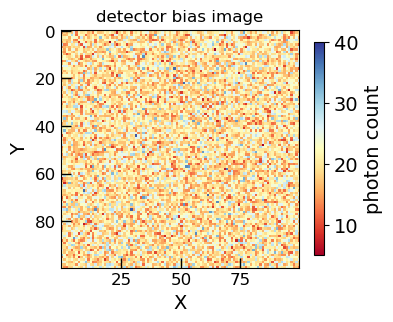

In [6]:
#random image to see addition of colorbar:

image = np.random.poisson( 20., ( 100, 100 ) )

fig, ax = plt.subplots( figsize = (4,4) )

image    = ax.imshow( image, interpolation = 'nearest', cmap='RdYlBu' )

ax.set_xlabel( 'X' , fontsize = 14 )
ax.set_xticks([25,50,75])
ax.set_ylabel( 'Y' , fontsize = 14 )
ax.tick_params( axis="both", labelsize=12 ) 
ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in', width = 1  )
ax.set_title('detector bias image')

#add colorbar:
cbar = fig.colorbar( image,shrink = .6 )
cbar.set_label('photon count',fontsize = 14 )
cbar.ax.tick_params(labelsize = 14)
plt.tight_layout()

### Reading in an image and plotting it

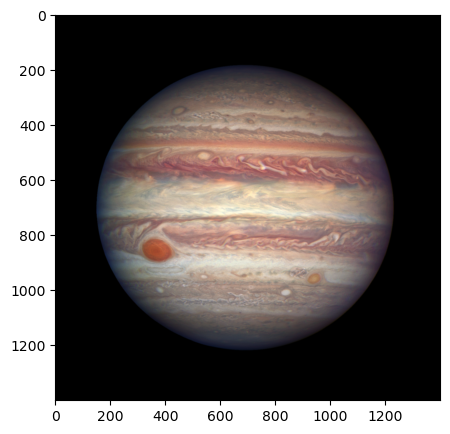

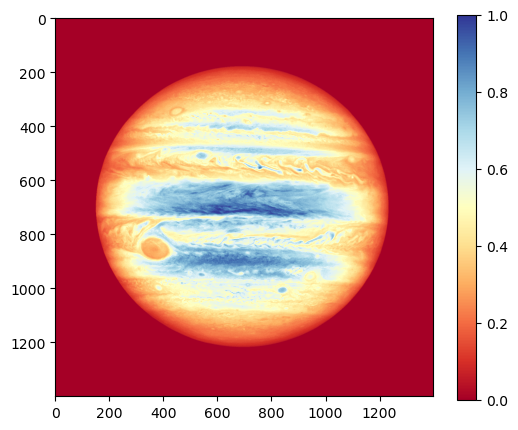

In [11]:
import matplotlib.image as mpimg
##read the image in as an n x m x 3 array for color (r,g,b) images.
img = mpimg.imread( 'jup_hst_nasa.png' )
##or just show it directly:
plt.figure(figsize = (5,5))
imgplot = plt.imshow(img)
plt.show()
##now plot:
plt.figure(figsize = (6.1,5))
limg = img[ :, :, 1]
imgplot = plt.imshow( limg, cmap = 'RdYlBu' )
plt.colorbar()
plt.show()

## Contour plots and `np.meshgrid`

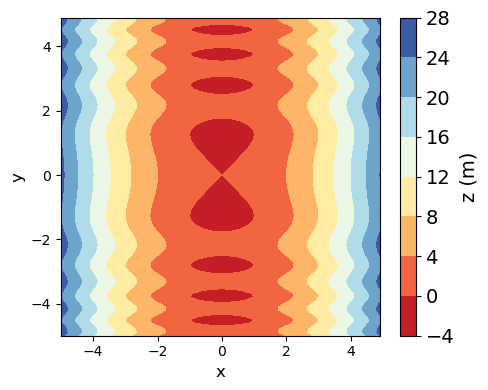

In [252]:
x    = np.arange( -5, 5, 0.1 )
y    = np.arange( -5.0, 5.0, 0.1)
xx, yy = np.meshgrid( x, y , sparse=True )

z =  xx**2 - np.sin(yy**2)  

fig, ax = plt.subplots(figsize = (5, 4 ))
ax.set_xlabel('x',fontsize = 12)
ax.set_ylabel('y',fontsize = 12)

cplot = ax.contourf( x, y, z ,  cmap='RdYlBu'  )

cbar = plt.colorbar(cplot, ax = ax  )

cbar.set_label('z (m)',fontsize = 14 )
cbar.ax.tick_params(labelsize = 14)
plt.tight_layout()
plt.show()

/var/folders/k4/29_257m513zg9w42bfwk5d400000gn/T/ipykernel_11720/3199868897.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( -6. + np.arange( 6 ) *2, fontsize = 12)
/var/folders/k4/29_257m513zg9w42bfwk5d400000gn/T/ipykernel_11720/3199868897.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels( -6. + np.arange( 6 ) *2, fontsize = 12)


[Text(0, -6.0, '-6.0'),
 Text(0, -4.0, '-4.0'),
 Text(0, -2.0, '-2.0'),
 Text(0, 0.0, '0.0'),
 Text(0, 2.0, '2.0'),
 Text(0, 4.0, '4.0'),
 Text(0, 6.0, '')]

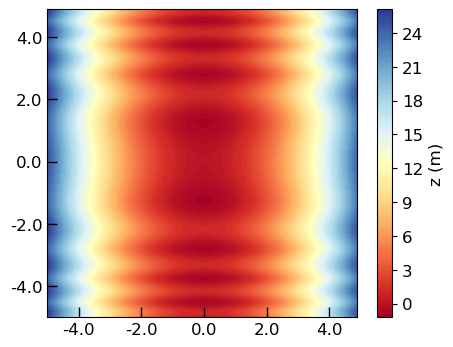

In [105]:
# or an alternative version:

#import matplotlib.colors as colors

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
#ax = ax.flatten()
bounds = np.linspace( np.min( z ) , np.max( z ) + .1, 100)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax.contourf(x, y ,z ,100, cmap='RdYlBu')

cbar = fig.colorbar( pcm )

cbar.set_label('z (m)',fontsize = 12 )
cbar.ax.tick_params(labelsize = 12)

ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in', width = 1 )
ax.set_xticklabels( -6. + np.arange( 6 ) *2, fontsize = 12)
ax.set_yticklabels( -6. + np.arange( 6 ) *2, fontsize = 12)

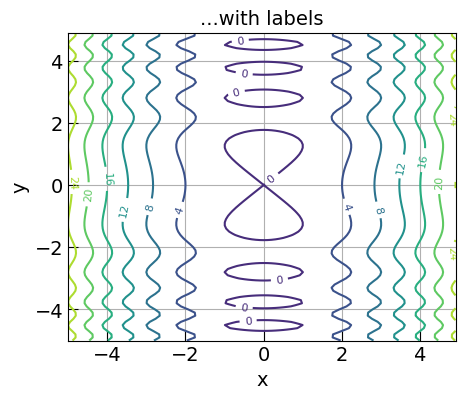

In [253]:
# or :

fig, ax = plt.subplots( figsize = ( 5, 4 ) )

CS = ax.contour( x, y, z )
ax.clabel( CS, inline=1, fontsize=8 )
ax.set_title( '...with labels' , fontsize = 14 )

ax.set_xlabel( 'x' , fontsize = 14 )
ax.set_ylabel( 'y' , fontsize = 14 )
ax.tick_params( axis="both", labelsize= 14 ) 
ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' )
ax.grid()
plt.show()

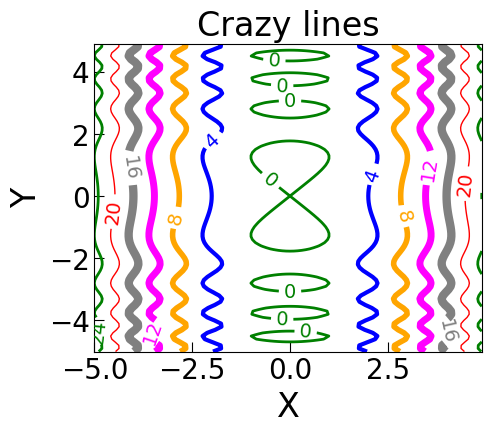

In [122]:
# you can also manually define the properties of your lines:
fig, ax = plt.subplots( figsize = ( 5, 4 ) )

CS = ax.contour( x,y,z, 6,
                linewidths = np.arange(1, 7, 1),
                colors = ('red', 'green', 'blue', 'orange', 'magenta', 'gray'),
                )

ax.clabel( CS, fontsize = 14, inline = True )
ax.set_title( 'Crazy lines', fontsize = 24)

ax.set_xlabel( 'X' , fontsize = 24 )
ax.set_ylabel( 'Y' , fontsize = 24 )
ax.tick_params( axis="both", labelsize=20 ) 
ax.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' )


### Practice 

1. get the file "first_data_read_plot.dat" and plot with the *ax* method the two spectra in 2 different, stacked plots


In [135]:
#get the data and overplot the two spectra:

In [5]:
#assign columns to three variables



In [254]:
#and how do I put them next to each other?


In [255]:
#and on top of each other?


### Practice
2. Get dataset 'whatsinthefile.dat' and contour plot it to find the image:

In [256]:
# read data in:
mystery_data = np.loadtxt('whatsinthefile.dat')
print(mystery_data[0:5,0:5])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### An intro to LaTeX and LaTeX in Python:
- An intro to writing reports/papers with LaTeX: https://www.overleaf.com/read/kbgmssxspcvw
- You can also use (some) LaTex code in Microsoft Equation Editor
- With Python you can use LaTeX for math in your plots. For example:

- $\mu$ ,$\sigma$, $\Gamma$
- $\int{x^2\cdot dx}$
- $\frac{a}{b}$
- $\nabla^2 f(x,y,z)$
- $\alpha_{x}^{y}$
- $\vec{W} = \frac{\partial y}{\partial t} \hat{i}$
- $\sum_{n = 0}^{\infty}{\frac{1}{a^n}}$

# 3D Plotting

In order to plot 3D figures use matplotlib, we need to import the *mplot3d* toolkit, which adds the simple 3D plotting capabilities to matplotlib.

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-poster')

Once we imported the *mplot3d* toolkit, we could create 3D axes and add data to the axes. Let's first create a 3D axes. 

In [179]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
plt.show()

The *ax = plt.axes(projection='3d')* created a 3D axes object, and to add data to it, we could use *plot3D* function. And we could change the title, set the x,y,z labels for the plot as well. 

**TRY IT!** Consider the parameterized data set t is a vector from 0 to $10\pi$ with a step $\pi/50$, x = sin(t), and y = cos(t). Make a three-dimensional plot of the (x,y,t) data set using *plot3*. Turn the grid on, make the axis equal, and put axis labels and a title. Let's also activate the interactive plot using *%matplotlib notebook*, so that you can move and rotate the figure as well. 

In [182]:
%matplotlib

Using matplotlib backend: macosx


In [184]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
t = np.arange(0, 10*np.pi, np.pi/50)
x = np.sin(t)
y = np.cos(t)

ax.plot3D(x, y, t)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

Try to rotate the above figure, and get a 3D view of the plot. You may notice that we also set the *labelpad=20* to the 3-axis labels, which will make the label not overlap with the tick texts. 

We could also plot 3D scatter plot using *scatter* function. 

**TRY IT!** Make a 3D scatter plot with randomly generate 50 data points for x, y, and z. Set the point color as red, and size of the point as 50. 

In [186]:
# We can turn off the interactive plot using %matplotlib inline
%matplotlib inline

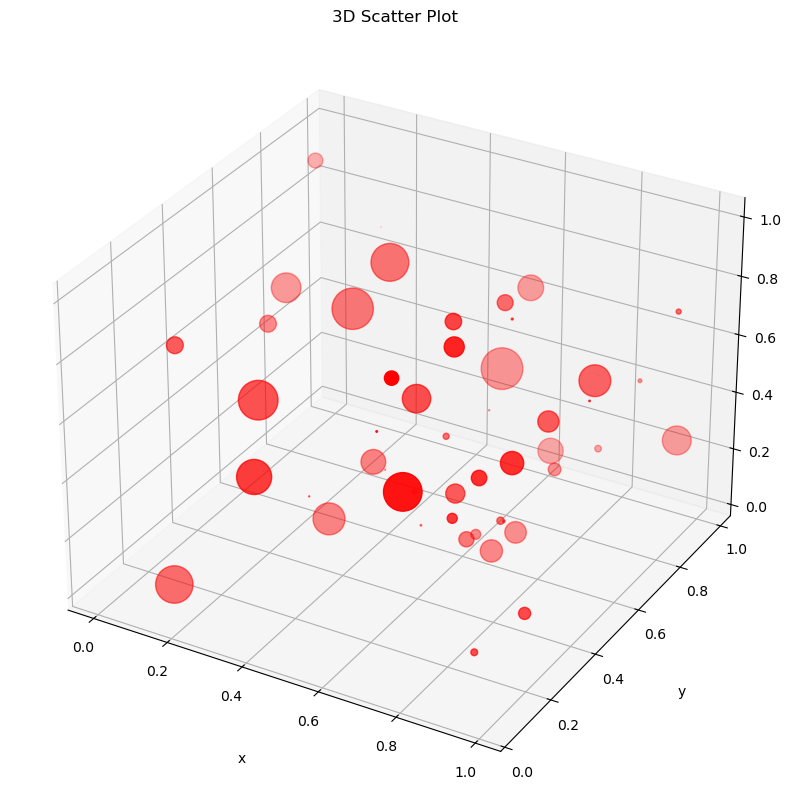

In [192]:
x = np.random.random(50)
y = np.random.random(50)
z = np.random.random(50)
particle_size = 1e3*np.random.random(50)**3

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'r', s = particle_size)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

Many times we would like a surface plot rather than a line plot when plotting in three dimensions. In three-dimensional surface plotting, we wish to make a graph of some relationship *f (x, y)*. In surface plotting all (x,y) pairs must be given. This is not straightforward to do using vectors. Therefore, in surface plotting, the first data structure you must create is called a mesh. Given lists/arrays of x and y values, a mesh is a listing of all the possible combinations of x and y. In Python, the mesh is given as two arrays X and Y where X (i,j) and Y (i,j) define possible (x,y) pairs. A third array, Z, can then be created such that Z (i,j) = f (X (i,j), Y (i,j)). A mesh can be created using the *np.meshgrid* function in Python. The *meshgrid* function has the inputs x and y are lists containing the independent data set. The output variables X and Y are as described earlier.

**TRY IT!** Create a mesh for x = [1, 2, 3, 4] and y = [3, 4, 5] using the *meshgrid* function. 

In [193]:
x = [1, 2, 3, 4]
y = [3, 4, 5]

X, Y = np.meshgrid(x, y)
print(X)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


In [194]:
print(Y)

[[3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]]


We could plot 3D surfaces in Python too, the function to plot the 3D surfaces is *plot_surface(X,Y,Z)*, where X and Y are the output arrays from *meshgrid*, and $Z = f (X,Y)$ or $Z (i,j) = f (X (i,j),Y (i,j))$. The most common surface plotting functions are surf and contour.

**TRY IT!** Make a plot of the surface $f(x,y) = sin(x)\cdot cos(y) for -5\le x\le5, -5\le y\le5$ using the *plot_surface* function. Take care to use a sufficiently fine discretization in x and y to make the plot look smooth. 

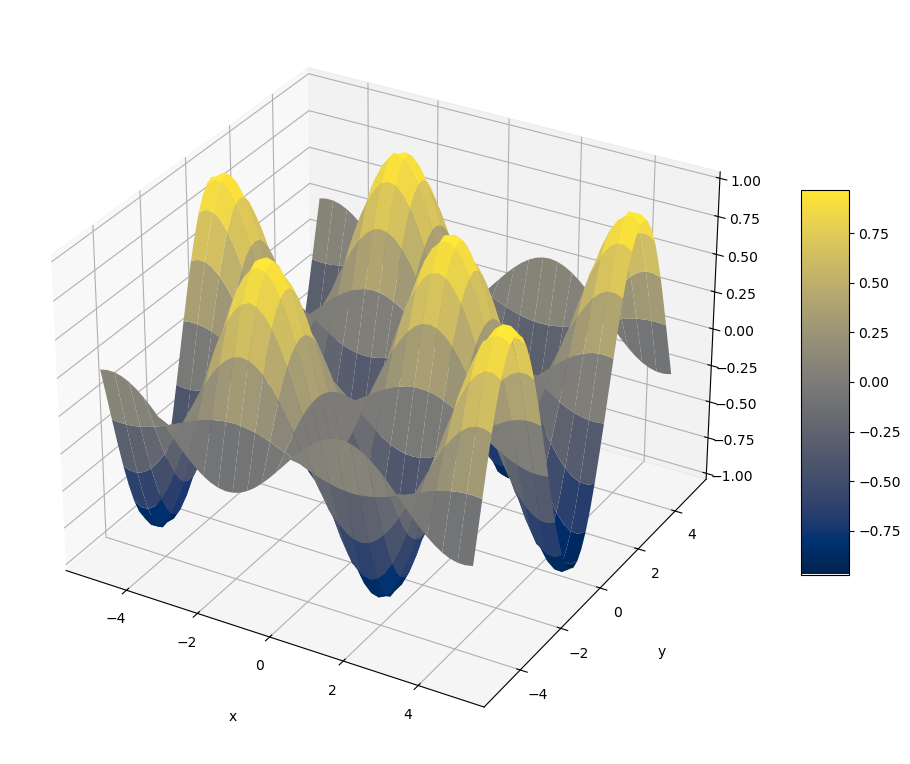

In [195]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y) #create a 2D matrix of x,y coordinate pairs from x,y 1D array
Z = np.sin(X)*np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

You will notice that the surface plot shows different colors for different elevations, yellow for higher and blue for lower, since we used the colormap *plt.cm.cividis* in the surface plot. You can change to different color schemes for the surface plot. These are left as exercises. We also plotted a colorbar to show the corresponding colors to different values. 

We could have subplots of different 3D plots as well. We could use the *add_subplot* function from the figure object we created to generate the subplots for 3D cases. 

'
**TRY IT!** Make a 1 by 2 subplot to plot the above X, Y, Z data in wireframe plot and surface plot. 

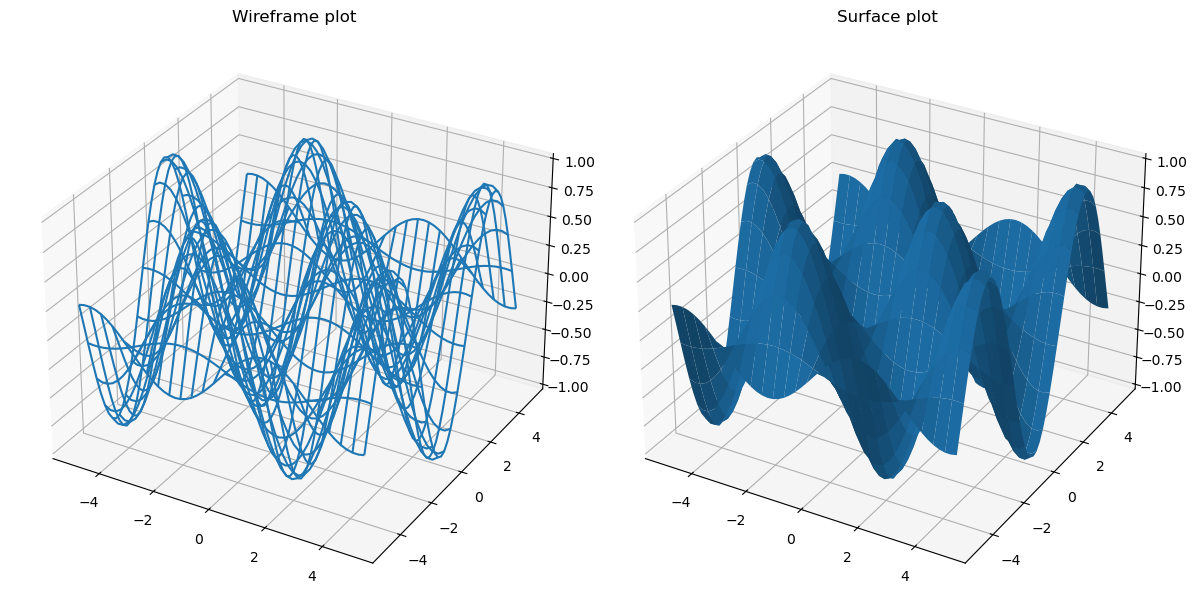

In [236]:
fig = plt.figure(figsize=(12,6))


ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_title('Wireframe plot')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_title('Surface plot')

plt.tight_layout()

plt.show()

There are many more functions related to plotting in Python and this is in no way an exhaustive list. However, it should be enough to get you started so that you can find the plotting functions in Python that suit you best and provide you with enough background to learn how to use them when you encounter them. You can find more examples of  different type 3D plots on the [mplot3d tutorial website](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html). 

# Animations and Movies

An animation is a sequence of still frames, or plots, that are displayed in fast enough succession to create the illusion of continuous motion. Animations and movies often convey information better than individual plots. You can create animations in Python by calling a plot function inside of a loop (usually a for-loop). The main tools for making animations in Python is the *matplotlib.animation.Animation* base class, which provides a framework around which the animation functionality is built. Let's see an example.

**TRY IT!** Create a propagating Gaussian wavepacket

We need to open a terminal and type:
`conda install -c conda-forge ffmpeg` in order to save the animation to an mpeg

In [2]:
#imports:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import ffmpeg

### Make a function to produce an image of the wave packet at a given time, $t$.

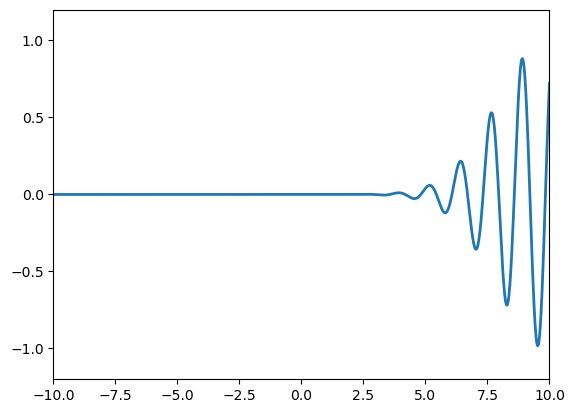

In [3]:
# Define constants
x_min, x_max = -10, 10  # Spatial domain
nx = 1000               # Number of spatial points
t_min, t_max = 0, 10    # Time domain
dt = 0.01               # Time step

# Spatial and time arrays
x = np.linspace(x_min, x_max, nx)

# Wave packet parameters
k0 = 5.0  # Central wavenumber
sigma = 2.0  # Width of the Gaussian envelope
omega0 = .5

# Define the initial wave packet
def wave_packet(x, t):
    # Gaussian envelope
    envelope = np.exp(-(x - 2 * k0 * t)**2 / (2 * sigma**2))
    # Sinusoidal wave
    wave = np.cos(k0 * x - omega0*t)
    # The wave packet is the product of the envelope and the wave
    return envelope * wave

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(-1.2, 1.2)

# Create an empty line object to be updated in the animation
line, = ax.plot([], [], lw=2)

# Initialize the plot line
def init():
    line.set_data([], [])
    return line,

# Update the plot with the new data for each frame
def update(frame):
    t = frame * dt  # Current time
    y = wave_packet(x, t)  # Wave packet at time t
    line.set_data(x, y)
    return line,

# Create animation object
ani = FuncAnimation(fig, update, frames=100, blit=True)

# Display animation in the notebook using HTML
HTML(ani.to_jshtml())



### Save the animation "ani" as an mp4

In [230]:
ani.save('wave_packet.mp4', writer='ffmpeg', fps=30)

# Working with Maps

In engineering and science, many times, we have to interact with maps. There are many different Python packages that could draw maps, such as [basemap](https://matplotlib.org/basemap/), [cartopy](https://scitools.org.uk/cartopy/docs/latest/), [folium](https://github.com/python-visualization/folium) and so on. The *folium* package allows you to plot interactive maps for webpages. But most of time, we only need to plot a static map to show some spatial features, and *basemap* and *cartopy* will do the job. In past, *basemap* is the official map package goes with *matplotlib*, but since 2016, it announced that the *cartopy* will replace *basemap*. Therefore, in this section, we will quickly introduce you how to draw maps with data using *cartopy*. You need to install the *cartopy* with *conda install cartopy*. 

The basics of a map is simple: it is a 2D plot with specific [projections](https://en.wikipedia.org/wiki/Map_projection). The x-axis is the longitude ranging from -180 to 180, which specifies the east-west position of a point on the Earth's surface. The y-axis is the latitude ranging from -90 to 90, that describes a point south-north position. If you specify a latitude and longitude pair, we could uniquely determine where the point is on the Earth. 

*cartopy* has very nice API to interact with *matplotlib*, to plot a map, we only need to tell the *matplotlib* to use a specific map projection, and then we can add other map features to the plot. 

**TRY IT!** Plot a world map with *cartopy* using Plate Carrée projection (google it), and draw the coastline on the map. 

In [197]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

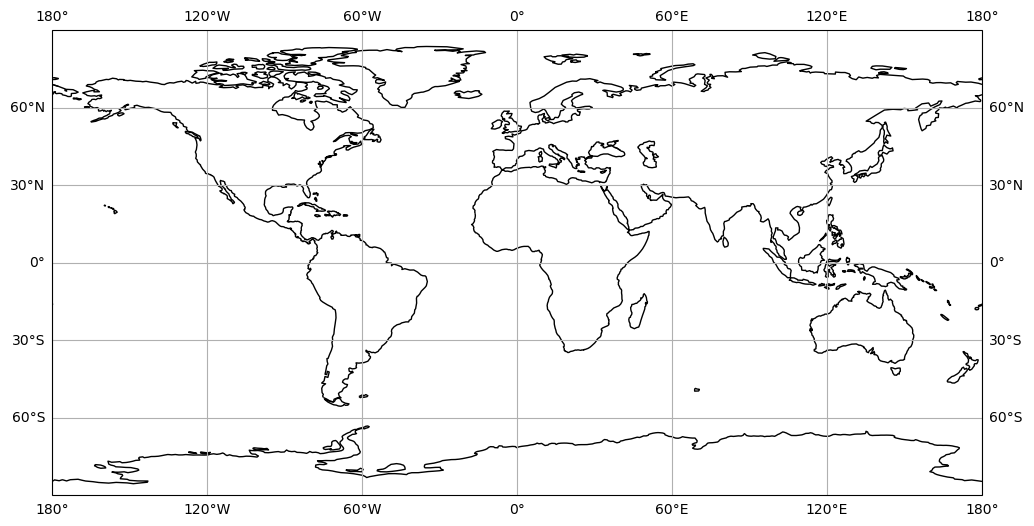

In [198]:
plt.figure(figsize = (12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()

In the above example, we plotted the map with the Plate Carrée projection, you can check out other [cartopy supported projections](https://scitools.org.uk/cartopy/docs/v0.16/crs/projections.html#cartopy-projections). Also, we turn on the grid lines and draw the labels on the maps as well. 

The map background we draw above is not so nice, we could easily add a nice map background in cartopy, note that, at the time of writing, the *stock_img* only have one image from a downsampled version of the Natural Earth shaded relief raster. 

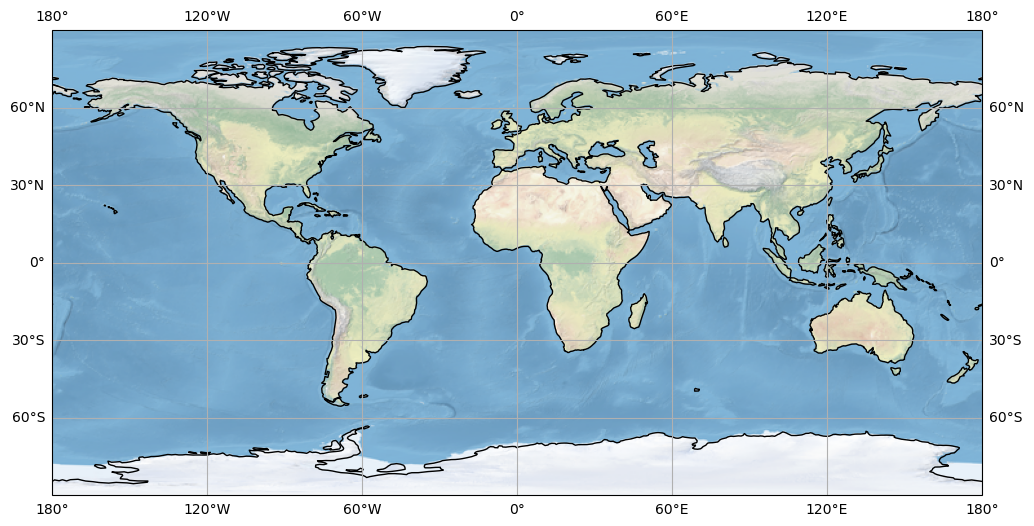

In [199]:
plt.figure(figsize = (12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)
plt.show()

Of course, we could zoom in the map to any places on the Earth using *ax.set_extent* function, which takes a list with the first two numbers are the x-axis limits and the last two numbers are the y-axis limits.

**TRY IT!** Zoom in the map to US. 

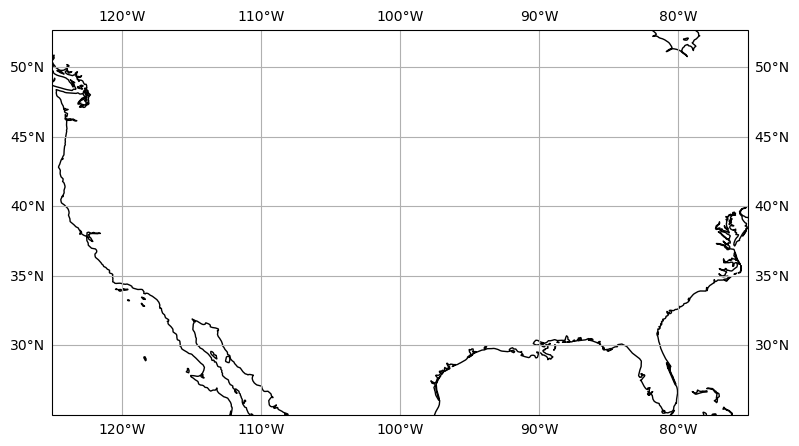

In [200]:
plt.figure(figsize = (10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-125, -75, 25, 50])
ax.gridlines(draw_labels=True)
plt.show()

One thing we notice that there is no features added on the map, such as the country boarder, state boundary, lakes/water, and so on. In cartopy, all these features need us to specify to add. 

**TRY IT!** For the US map we made above, add features: land, ocean, states and country borders, lakes and rivers. 

In [201]:
import cartopy.feature as cfeature

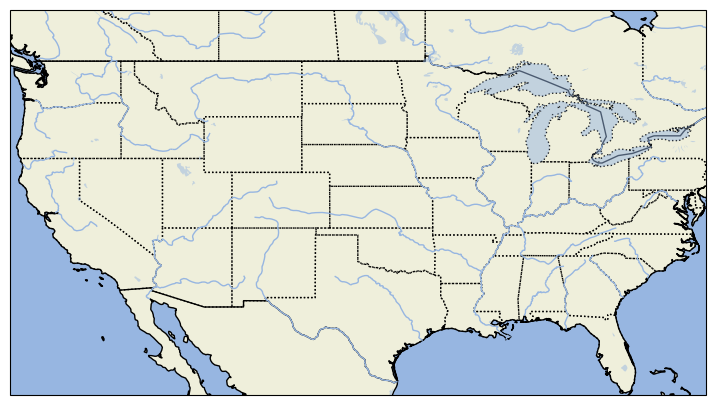

In [202]:
plt.figure(figsize = (10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-125, -75, 25, 50])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.show()

We could zoom in further to a smaller area, but then we need to download and use the high-resolution coastlines and land to have a good-looking map. 

**TRY IT!** Plot the San Francisco Bay Area with the 10m-resolution coast lines and land. Try to change one of them to 50m and see what will happen. 

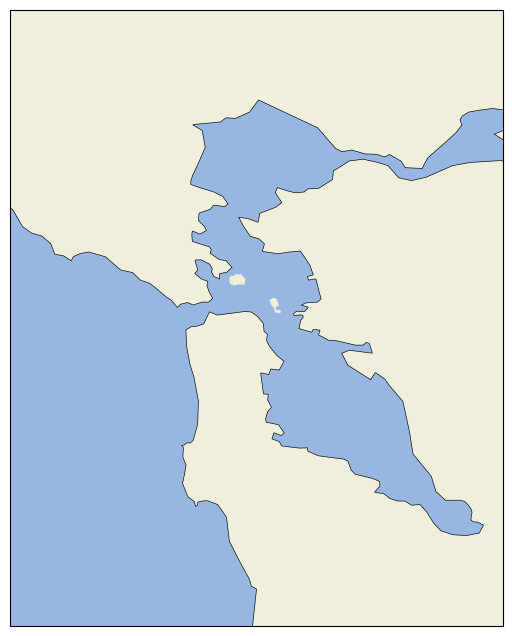

In [203]:
plt.figure(figsize = (10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_extent([-122.8, -122, 37.3, 38.3])

# we can add high-resolution land
LAND = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'],
                                        linewidth=.1
                                   )
# we can add high-resolution water
OCEAN = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'],
                                        linewidth=.1
                                   )

ax.add_feature(LAND, zorder=0)
ax.add_feature(OCEAN)

plt.show()

Of course, in many cases, we want to plot our data onto the map and show the spatial location of some entities or others. Data can be added to it in exactly the same way as with normal matplotlib axes. By default, the coordinate system of any data added to is the same as the coordinate system of the axes we defined at the beginning of the plot. Let's first try to add some data to the map above. 

**TRY IT!** Add UC Berkeley and Stanford University on the Bay Area map above.  

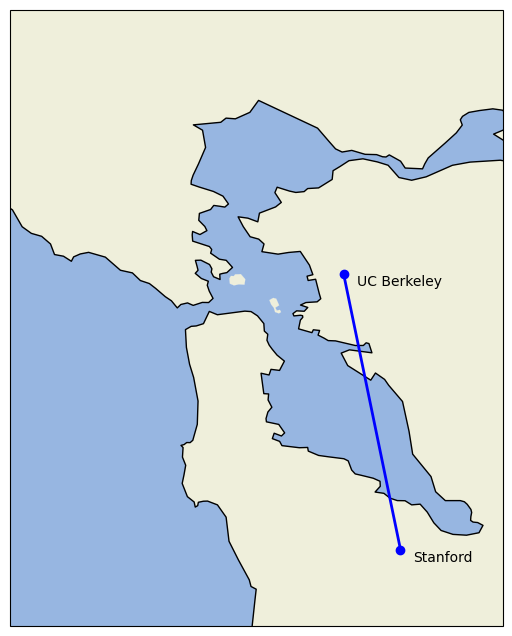

In [204]:
plt.figure(figsize = (10, 8))

# plot the map related stuff
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_extent([-122.8, -122, 37.3, 38.3])

# we can add high-resolution land
ax.add_feature(LAND, zorder=0)
ax.add_feature(OCEAN, zorder=0)

# plot the data related stuff
berkeley_lon, berkeley_lat = -122.2585, 37.8719
stanford_lon, stanford_lat = -122.1661, 37.4241

# plot the two universities as blue dots
ax.plot([berkeley_lon, stanford_lon], [berkeley_lat, stanford_lat],
         color='blue', linewidth=2, marker='o')

# add labels for the two universities
ax.text(berkeley_lon + 0.16, berkeley_lat - 0.02, 'UC Berkeley',
         horizontalalignment='right')

ax.text(stanford_lon + 0.02, stanford_lat - 0.02, 'Stanford',
         horizontalalignment='left')

plt.show()

There are many other things we could plot with cartopy package, you can find the official -[example gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) and learn more of making nice maps. 

# Summary


1. Visualizing data is an essential tool in engineering and science. 
2. Python has many different library of plotting tools that can be used to visualize data. 
3. 2D, 3D plots and maps are usually used in engineering and science to communicate research.
4. Videos are a sequence of static images that displayed at certain speed. 

### Practice Problems

1. A cycloid is the curve traced by a point located on the edge of a wheel rolling along a flat surface. The $(x,y)$ coordinates of a cycloid generated from a wheel with radius, $r$, can be described by the parametric equations:

 $x = r(\phi - \sin{\phi})$

 $y = r(1 - \cos{\phi})$
 
 where $\phi$ is the number of radians that the wheel has rolled through.
 
 Generate a plot of the cycloid for $0 \le \phi \le 2\pi$ using 1000 increments and $r = 3$. Give your plot a title and labels. Turn the grid on and modify the axis limits to make the plot neat.
 
2. Consider the following function:

 $y(x) = \sqrt{\frac{100(1-0.01x^2)^2 + 0.02x^2}{(1-x^2)^2 + 0.1x^2}}.$

 Generate a $2 \times 2$ subplot of $y(x)$ for $0 \le x \le 100$ using *plot*, *semilogx*, *semilogy*, and *loglog*. Use a fine enough discretization in *x* to make the plot appear smooth. Give each plot axis labels and a title. Turn the grid on. Which plot seems to convey the most information?.
 
3. Plot the functions $y_1(x) = 3 + \exp{-x}\sin{(6x)}$ and $y_2(x) = 4 + \exp{(-x)}\cos{(6x)}$ for $0 \le x \le 5$ on a single axis. Give the plot axis labels, a title, and a legend.

4. Generate 1000 normally distributed random numbers using the *np.random.randn* function. Look up the help for the *plt.hist* function. Use the *plt.hist* function to plot a histogram of the randomly generated numbers. Use the *plt.hist* function to distribute the randomly generated numbers into 10 bins. Create a bar graph of output of hist using the *plt.bar* function. It should look very similar to the plot produced by *plt.hist*.

 Do you think that the *np.random.randn* function is a good approximation of a normally distributed number?. 
 
5. Let the number of students with A's, B's, C's, D's, and F's be contained in the list *grade_dist = [42, 85, 67, 20, 5]*. Use the *plt.pie* function to generate a pie chart of *grade_dist*. Put a title and legend on the pie chart.

6. Let $-4 \le x \le 4, -3 \le y \le 3$, and $z(x,y) = \frac{xy(x^2 - y^2)}{x^2 + y^2}$. Create arrays *x* and *y* with 100 evenly spaced points over the interval. Create meshgrids *X* and *Y* for *x* and *y* using the *meshgrid* function. Compute the matrix *Z* from *X* and *Y* . Create a $1 \times 2$ subplot where the first figure is the 3D surface *Z* plotted using *plt.plot_surface* and the second figure is the 3D wireframe plot using *plt.plot_wireframe*, respectively. Give each axis a title and axis labels.

7. Write a function *my_polygon(n)* that plots a regular polygon with *n* sides and radius 1. Recall that the radius of a regular polygon is the distance from its centroid to the vertices. Use *plt.axis('equal')* to make the polygon look regular. Remember to give the axes a label and a title. You can use *plt.title* to title the plot according to the number of sides. Hint: This problem is significantly easier if you think in polar coordinates. Recall that a complete revolution around the unit circle is $2\pi$ radians. Note: The first and last point on the polygon should be the point associated with the polar coordinate angles, $0$ and $2\pi$, respectively. 

 Test cases:
 
 ```python
 my_polygon(5) 
 ```
 
8. Write a function *my_fun_plotter(f, x)* where f is a lambda function and x is an array. The function should plot *f* evaluated at *x*. Remember to label the x- and y-axis. 

 Test cases:
 
 ```python
 my_fun_plotter(lambda x: np.sqrt(x) + np.exp(np.sin(x)), np.linspace(0, 2*np.pi, 100))
 ```
  
9. Write a function with *my_poly_plotter (n,x)* that plots the polynomials $p_k(x) = x^k$ for $k = 1,\ldots,n$. Make sure your plot has axis labels and a title.

 Test cases:
 
 ```python
 my_poly_plotter(5, np.linspace(-1, 1, 200))
 ```

 
10. Assume you have three points at the corner of an equilateral triangle, $P_1 = (0,0), P_2 = (0.5,\sqrt{2}/2)$, and $P_3 = (1,0)$. Now you want to generate another set of points $p_i = (x_i, y_i)$ such that $p_1 = (0,0)$ and $p_{i+1}$ is the midpoint between $p_i$ and $P_1$ with 33% probability, the midpoint between $p_i$ and $P_2$ with 33% probability, and the midpoint between $p_i$ and $P_3$ with 33% probability. Write a function *my_sierpinski (n)* that generates the points $p_i$ for $i = 1,\cdots,n$. The function should make a plot of the points using blue dots (i.e., 'b.' as the third argument to the *plt.plot* function).

 Test cases:
 
 ```python
 my_sierpinski(100)
 ```
 

 
 ```python
 my_sierpinski(10000)
 ```
 

 
11. Assume you are generating a set of points $(x_i, y_i)$ where $x_1 = 0$ and $y_1 = 0$. The points $(x_i, y_i)$ for $i = 2,\cdots,n$ is generated according to the following probabilistic relationship:

 With 1% probability:

 $x_i = 0$

 $y_i = 0.16y_{i-1}$

 With 7% probability:

 $x_i = 0.2x_{i-1} - 0.26y_{i-1}$

 $y_i = 0.23x_{i-1} + 0.22y_{i-1} + 1.6$

 With 7% probability:

 $x_i = -0.15x_{i-1} + 0.28y_{i-1}$

 $y_i = 0.26x_{i-1} + 0.24y_{i-1} + 0.44$

 With 85% probability:

 $x_i = 0.85x_{i-1} + 0.04y_{i-1}$

 $y_i = -0.04x_{i-1} + 0.85y_{i-1} + 1.6$

 Write a function *my_fern (n)* that generates the points $(x_i,y_i)$ for $i = 1,\ldots,n$ and plots them using blue dots. Also use *plt.axis('equal')* and *plt.axis('off')* to make the plot looks nicer. 
 
 Test cases:
 
 ```python
 my_fern(100)
 ```
 
 
  Try your function for n = 10000. The image generated is called a stochastic fractal. Many times it is cheaper (i.e. requires less space) to store the fractal generating code rather than the image. This makes stochastic fractals useful for image compression. 
  
  ```python
  my_fern(10000)
  ```
 

12. Write a function *my_parametric_plotter (x,y,t)* where *x* and *y* are function objects *x (t)* and *y (t)*, respectively, and *t* is a one-dimensional~array. The function *my_parametric_plotter* should produce the curve $(x(t), y(t), t)$ in a three-dimensional plot. Be sure to give your plot a title and axis labels.

 Test cases:
 
 ```python
 from mpl_toolkits import mplot3d
 f = lambda t: np.sin(t)
 g = lambda t: t**2
 my_parametric_plotter(f, g, np.linspace(0, 6*np.pi, 100))
    
 ```
 
 
13. Write a function *my_surface_plotter(f, x, y, option)* where *f* is a function object *f (x,y)*. The function *my_surface_plotter* should produce a 3D surface plot of *f (x,y)* using *plot_surface* if option is the string 'surface'. It should produce a contour plot of *f (x,y)* if the option is the string 'contour'. Assume that *x* and *y* are one-dimensional arrays or lists. Remember to give the plot a title and axis labels.

 Test cases:
 
 ```python
 from mpl_toolkits import mplot3d
 f = lambda x, y: np.cos(y)*np.sin(np.exp(x))
 my_surface_plotter(f, np.linspace(-1, 1, 20), np.linspace(-2, 2, 40), 'surface')
 my_surface_plotter(f, np.linspace(-1, 1, 20), np.linspace(-2, 2, 40), 'contour')
 ```
 

14. Write a line of code that generates the following error:


```
ValueError: x and y must have same first dimension, ... 
```

15. We could make maps using different Web Map Tile Service (WMTS) online in *cartopy*. Plot an earth-night map as the one showing below for the main part of North America, with the extent latitude from 19.50139 to 64.85694 and longitude from -128.75583 to -68.01197. Hint: check out the gallery on *cartopy* website. 

 